In [1]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential

/home/mk/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# sample weights
np.random.seed(0)
w = 0.5 * np.random.normal(size=(4, 4))
b = np.zeros((4))

---

In [3]:
model1 = Sequential(name="model1")
model1.add(Dense(4, activation='sigmoid', input_shape=(4,), weights=(w, b), name="dense1"))
type(model1)

keras.models.Sequential

In [4]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


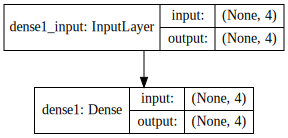

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model1, show_shapes=True).create(prog='dot', format='svg'))

---

Model class 이용

In [6]:
input_layer2 = Input(shape=(4,), name="input2")
hidden_layer2 = Dense(4, activation='sigmoid', weights=(w, b), name="dense2")(input_layer2)
model2 = Model(input_layer2, hidden_layer2, name="model2")
type(model2)

keras.engine.training.Model

In [7]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (InputLayer)          (None, 4)                 0         
_________________________________________________________________
dense2 (Dense)               (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


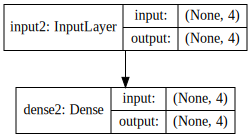

In [8]:
SVG(model_to_dot(model2, show_shapes=True).create(prog='dot', format='svg'))

Sequential과 동일한 결과

Model 객체는 model, sequential로 만든 객체 입력이 가능하다. ( 다중 레이어 )

In [9]:
model3 = Model(input_layer2, model1(input_layer2), name="model3")
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (InputLayer)          (None, 4)                 0         
_________________________________________________________________
model1 (Sequential)          (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


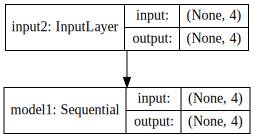

In [10]:
SVG(model_to_dot(model3, show_shapes=True).create(prog='dot', format='svg'))

In [11]:
input_layer4 = Input(shape=(4,), name="input4")
model4 = Model(input_layer4, model2(input_layer4), name="model4")
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input4 (InputLayer)          (None, 4)                 0         
_________________________________________________________________
model2 (Model)               (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


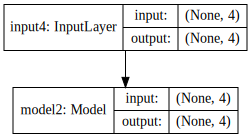

In [12]:
SVG(model_to_dot(model4, show_shapes=True).create(prog='dot', format='svg'))

In [13]:
data = np.ones((1, 4))
y = 1 / (1 + np.exp(-(w.T).dot(data.T)))
y

array([[0.89517384],
       [0.49439434],
       [0.7787448 ],
       [0.87421386]])

In [14]:
print(model1.predict(data))
print(model2.predict(data))
print(model3.predict(data))
print(model4.predict(data))

[[0.89517385 0.49439433 0.7787448  0.8742138 ]]
[[0.89517385 0.49439433 0.7787448  0.8742138 ]]
[[0.89517385 0.49439433 0.7787448  0.8742138 ]]
[[0.89517385 0.49439433 0.7787448  0.8742138 ]]


하는 일은 모두 같다.

## Serial Model
모델을 직렬로 연결하기 위해서는 `모델을 레이어로 만들기 위한` 추가적인 `input` 레이어가 필요하다.
`Model(input_, model2(model1(input_)))`

In [15]:
input_5 = Input(shape=(4,), name="input5")
model5 = Model(input_5, model2(model1(input_5)), name="model5")
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input5 (InputLayer)          (None, 4)                 0         
_________________________________________________________________
model1 (Sequential)          (None, 4)                 20        
_________________________________________________________________
model2 (Model)               (None, 4)                 20        
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


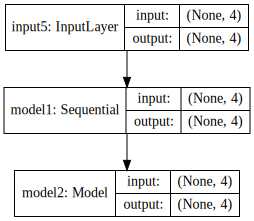

In [16]:
SVG(model_to_dot(model5, show_shapes=True).create(prog='dot', format='svg'))

In [17]:
model5.predict(data)

array([[0.82399994, 0.53757536, 0.71565944, 0.8425977 ]], dtype=float32)

In [18]:
data = np.ones((1, 4))
y = 1 / (1 + np.exp(-(w.T).dot(data.T)))
y.T

array([[0.89517384, 0.49439434, 0.7787448 , 0.87421386]])

In [19]:
y2 = 1 / (1 + np.exp(-(w.T).dot(y))) # 중간 결과값 y가 인풋이 됨
y2.T

array([[0.82399994, 0.5375754 , 0.71565945, 0.84259771]])